# NVFLARE Federated Statistics Visualization

#### dependencies

To run this example, you need to install the dependencies
* monai[itk]
* numpy
* pandas
* kaleido
* matplotlib
* jupyter
* notebook

These are captured in the requirements.txt


## Image Statistics Visualization
In this example, we demonstate how to visualize the results from the statistics of image data. The visualization requires json, pandas, matplotlib modules as well as nvflare visualization utlities. 

In [1]:

import json
import pandas as pd
from nvflare.app_opt.statistics.visualization.statistics_visualization import Visualization

First, copy the resulting json file to demo directory. In this example, resulting file is called image_statistics.json. Then load json file


In [2]:
with open('image_statistics.json', 'r') as f:
    data = json.load(f)

Initialize the Visualization utilities


In [3]:
vis = Visualization()


### Overall Statistics
vis.show_stats() will show the statistics for each features, at each site for each dataset

vis.show_stats(data = data)


In [4]:
vis.show_stats(data = data)


intensity



,count,histogram
site-4-train,1345,"[[0.0, 1.0039000511169434, 7529944], [1.003900..."
site-1-train,3616,"[[0.0, 1.0039000511169434, 10894028], [1.00390..."
site-2-train,6012,"[[0.0, 1.0039000511169434, 15941521], [1.00390..."
site-3-train,10192,"[[0.0, 1.0039000511169434, 35420536], [1.00390..."
Global-train,21165,"[[0.0, 1.0039000511169434, 69786029], [1.00390..."


### select features statistics using white_list_features 
user can optionally select only show specified features via white_list_features arguments. In these image files, we only have one feature

### Histogram Visualization
We can use vis.show_histograms() to visualize the histogram. Before we do that, we need set some iPython display setting to make sure the graph displayed in full cell. 

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100%  depth:100% !important; }</style>"))

The following command display histograms for numberic features. The result shows both main plot

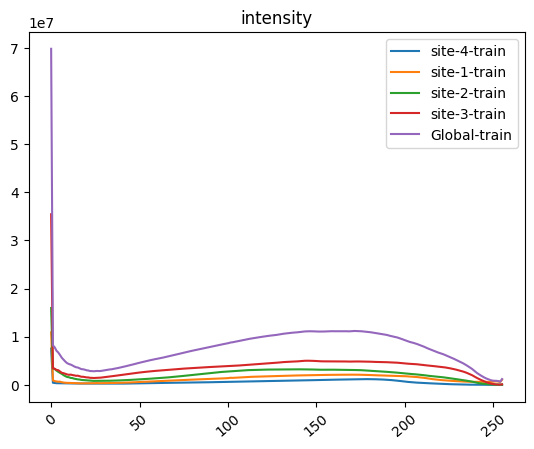

In [6]:
vis.show_histograms(data = data, plot_type="main")

## Display Options
Similar to other statistics, we can use white_list_features to select only few features to display histograms. We can also use display_format="percent" to allow all dataset and sites to be displayed in the same scale. User can set 

* display_format: "percent" or "sample_count"
* white_list_features: feature names
* plot_type : "both" or "main" or "subplot"




#### show default display format with subplot
In the following, we display only feature "Intensity" in default display_format, with "subplot" plot_type

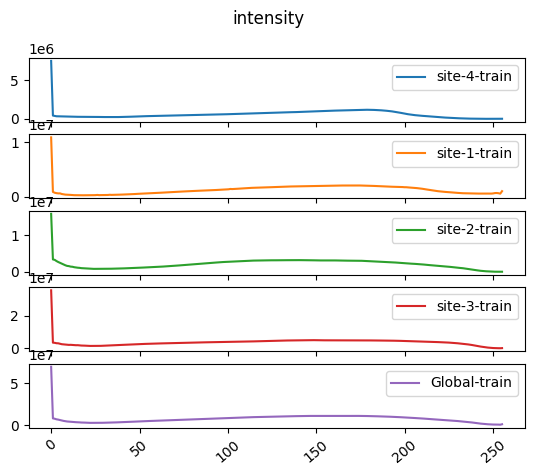

In [5]:
vis.show_histograms(data = data, plot_type="subplot")


#### show percent display format with default plot_type (main)
In the following, we display only feature "Intensity" in "percent" display_format, with default plot_type

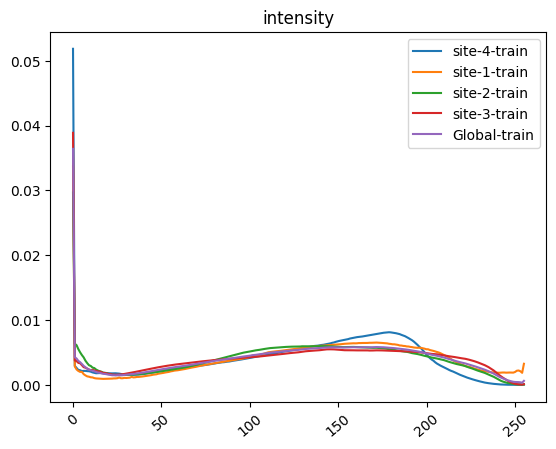

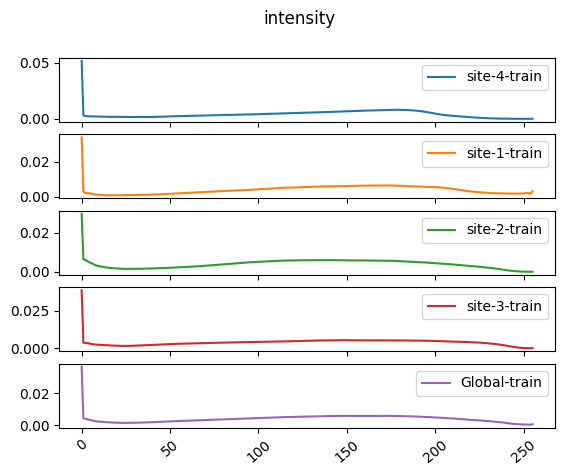

In [6]:
vis.show_histograms(data = data, display_format="percent")

### Tip: Avoid repeated calculation


If you intend to plot histogram main plot and subplot separately, repeated calling show_histogram with different plot_types is not efficicent, as it repeatewd calculate the same set of Dataframes. To do it efficiently, you can use the following functions instead show_histogram methods. This avoid the duplicated calculation in show_histograms. But if you intend to show both plots, the show_histogram() should be used

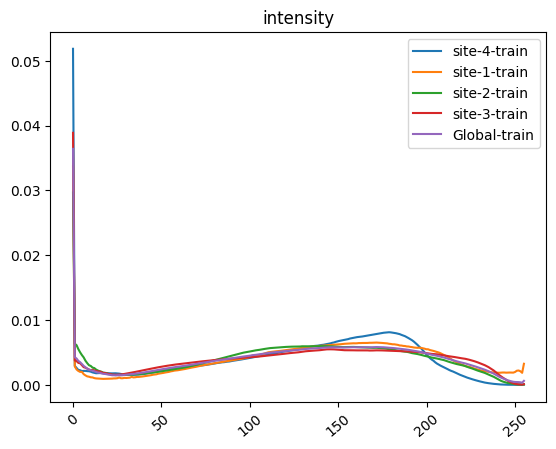

In [19]:
 feature_dfs = vis.get_histogram_dataframes(data, display_format="percent" )
   
 vis.show_dataframe_plots(feature_dfs, plot_type="main")   

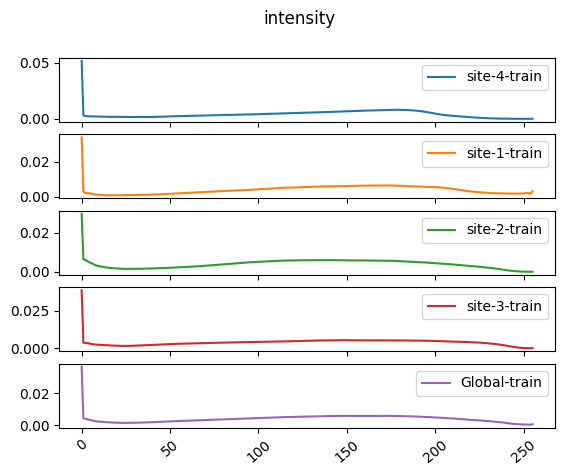

In [8]:
 vis.show_dataframe_plots(feature_dfs, plot_type="subplot")   